In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

perf_metric_idx = 2
# pool versus stream
# standard active learning, random selection, oracle as feature extractor
pool_al_dir = 'al_step_checkpoints/methodKMeansSampling_ratio0.5-MMFi-PointTransformer-original-2024-12-20_13-23-02'
pool_random_dir = 'random_checkpoints'
pool_oracle_dir = 'oracle_checkpoints'
stream_al_dir = 'al_stream_step_checkpoints/methodKMeansSampling_ratio0.5-MMFi-PointTransformer-original-2024-12-20_21-05-25'
stream_random_dir = 'stream_random_checkpoints'
stream_oracle_dir = 'stream_oracle_checkpoints'

mmfi_all_perf = [82.1213, 61.3635][perf_metric_idx-1]

In [2]:
def extract_number_from_string(s):
    match = re.search(r'[a-zA-Z](\d*\.?\d+)', s)
    if match:
        number = float(match.group(1))
        return number
    else:
        return None

In [3]:
pool_al_dict = {}
stream_al_dict = {}
for i in range(5, 100, 5):
    pool_al_dict[i] = 0
    stream_al_dict[i] = 0

pool_files = os.listdir(pool_al_dir)
for pool_fname in pool_files:
    if not pool_fname.endswith('.pth'):
        continue
    fname_list = pool_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    pool_al_dict[cur_epoch] = cur_res

stream_files = os.listdir(stream_al_dir)
for stream_fname in stream_files:
    if not stream_fname.endswith('.pth'):
        continue
    fname_list = stream_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    stream_al_dict[cur_epoch] = cur_res

for i in range(5, 100, 5):
    k = 1
    while pool_al_dict[i] == 0:
        pool_al_dict[i] = pool_al_dict[i-5*k]
        k += 1
    if i > 5 and pool_al_dict[i] > pool_al_dict[i-5]:
        pool_al_dict[i] = pool_al_dict[i-5]
    k = 1
    while stream_al_dict[i] == 0:
        stream_al_dict[i] = stream_al_dict[i-5*k]
        k += 1
    if i > 5 and stream_al_dict[i] > stream_al_dict[i-5]:
        stream_al_dict[i] = stream_al_dict[i-5]


print(pool_al_dict)
print(stream_al_dict)

{5: 88.5596, 10: 73.3272, 15: 70.331, 20: 68.2579, 25: 68.2579, 30: 68.2579, 35: 68.2579, 40: 67.2517, 45: 67.2517, 50: 66.2626, 55: 64.942, 60: 64.942, 65: 64.942, 70: 63.4005, 75: 62.8253, 80: 62.8253, 85: 62.8253, 90: 62.8253, 95: 62.8253}
{5: 112.2341, 10: 98.2719, 15: 91.6747, 20: 91.6747, 25: 88.1681, 30: 88.1681, 35: 86.4822, 40: 85.7307, 45: 78.7663, 50: 78.7663, 55: 78.7663, 60: 76.7803, 65: 76.7803, 70: 76.7803, 75: 76.7803, 80: 73.038, 85: 72.7288, 90: 72.0574, 95: 69.9489}


In [4]:
pool_random_dict = {}
stream_random_dict = {}
for i in range(5, 100, 5):
    pool_random_dict[i] = []
    stream_random_dict[i] = []
    
pool_random_files = [f for f in os.listdir(pool_random_dir) if 'MMFi' in f]
stream_random_files = [f for f in os.listdir(stream_random_dir) if 'MMFi' in f]

for random_fname in pool_random_files:
    fname_list = random_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in pool_random_dict:
        continue
    cur_res_files = os.listdir(os.path.join(pool_random_dir, random_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        pool_random_dict[cur_epoch].append(cur_res)
    
for random_fname in stream_random_files:
    fname_list = random_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in stream_random_dict:
        continue
    cur_res_files = os.listdir(os.path.join(stream_random_dir, random_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        stream_random_dict[cur_epoch].append(cur_res)

for i in range(5, 100, 5):
    if len(pool_random_dict[i]) == 0:
        pool_random_dict[i] = 0
    else:
        pool_random_dict[i] = np.mean(pool_random_dict[i])
    if len(stream_random_dict[i]) == 0:
        stream_random_dict[i] = 0
    else:
        stream_random_dict[i] = np.mean(stream_random_dict[i])

for i in range(5, 100, 5):
    k = 1
    while pool_random_dict[i] == 0:
        pool_random_dict[i] = pool_random_dict[i-5*k]
        k += 1
    k = 1
    while stream_random_dict[i] == 0:
        stream_random_dict[i] = stream_random_dict[i-5*k]
        k += 1

print(pool_random_dict)
print(stream_random_dict)

{5: 84.35186666666668, 10: 78.22716666666666, 15: 78.76376666666668, 20: 76.71226666666666, 25: 71.45796666666666, 30: 76.08139999999999, 35: 74.2406, 40: 70.41466666666666, 45: 72.10860000000001, 50: 70.5674, 55: 67.29610000000001, 60: 69.58173333333333, 65: 66.6082, 70: 73.69326666666667, 75: 70.33536666666667, 80: 69.62493333333333, 85: 67.18776666666666, 90: 69.09733333333334, 95: 70.89643333333333}
{5: 98.71005, 10: 105.78399999999999, 15: 102.75745, 20: 98.50264999999999, 25: 91.0195, 30: 95.5491, 35: 92.6781, 40: 80.89265, 45: 83.2396, 50: 84.0855, 55: 78.5022, 60: 74.8931, 65: 76.89965000000001, 70: 79.93235, 75: 77.49995, 80: 73.44475, 85: 74.08475, 90: 71.73920000000001, 95: 68.83824999999999}


In [5]:
pool_oracle_dict = {}
stream_oracle_dict = {}
for i in range(5, 100, 5):
    pool_oracle_dict[i] = []
    stream_oracle_dict[i] = []
    
pool_oracle_files = [f for f in os.listdir(pool_oracle_dir) if 'MMFi' in f]
stream_oracle_files = [f for f in os.listdir(stream_oracle_dir) if 'MMFi' in f]

for oracle_fname in pool_oracle_files:
    fname_list = oracle_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in pool_oracle_dict:
        continue
    cur_res_files = os.listdir(os.path.join(pool_oracle_dir, oracle_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        pool_oracle_dict[cur_epoch].append(cur_res)

for oracle_fname in stream_oracle_files:
    fname_list = oracle_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in stream_oracle_dict:
        continue
    cur_res_files = os.listdir(os.path.join(stream_oracle_dir, oracle_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        stream_oracle_dict[cur_epoch].append(cur_res)

for i in range(5, 100, 5):
    if len(pool_oracle_dict[i]) == 0:
        pool_oracle_dict[i] = 0
    else:
        pool_oracle_dict[i] = np.mean(pool_oracle_dict[i])
    if len(stream_oracle_dict[i]) == 0:
        stream_oracle_dict[i] = 0
    else:
        stream_oracle_dict[i] = np.mean(stream_oracle_dict[i])

for i in range(5, 100, 5):
    k = 1
    while pool_oracle_dict[i] == 0:
        pool_oracle_dict[i] = pool_oracle_dict[i-5*k]
        k += 1
    k = 1
    while stream_oracle_dict[i] == 0:
        stream_oracle_dict[i] = stream_oracle_dict[i-5*k]
        k += 1

print(pool_oracle_dict)
print(stream_oracle_dict)

{5: 90.4878, 10: 77.9399, 15: 76.6809, 20: 78.9731, 25: 73.7755, 30: 73.1501, 35: 75.829, 40: 73.816, 45: 70.6882, 50: 73.7984, 55: 73.2783, 60: 77.1135, 65: 77.1135, 70: 77.1135, 75: 77.1135, 80: 77.1135, 85: 77.1135, 90: 77.1135, 95: 77.1135}
{5: 102.6622, 10: 100.8512, 15: 95.7476, 20: 99.7939, 25: 91.4319, 30: 86.865, 35: 87.4021, 40: 76.9115, 45: 78.8565, 50: 78.3707, 55: 92.2065, 60: 80.6076, 65: 82.787, 70: 82.787, 75: 82.787, 80: 82.787, 85: 82.787, 90: 82.787, 95: 82.787}


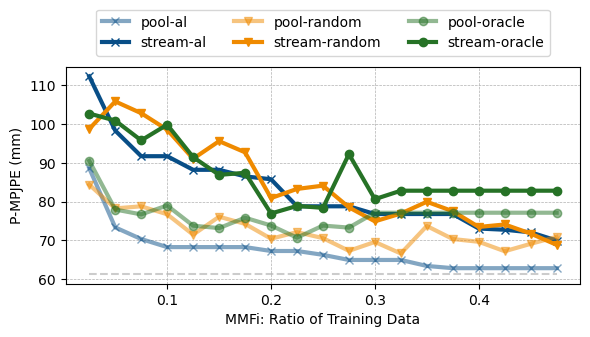

In [6]:
# plot the performance of different methods
plt.figure(figsize=(6, 3.5))
ax = plt.subplot()
colors = ['#084E87', '#ef8a00', '#267226', '#BF3F3F', '#414141', "#282828"]
x = np.array(list(pool_al_dict.keys()))
x = [i/100*0.5 for i in x]
pool_al_y = np.array(list(pool_al_dict.values()))
stream_al_y = np.array(list(stream_al_dict.values()))
pool_random_y = np.array(list(pool_random_dict.values()))
stream_random_y = np.array(list(stream_random_dict.values()))
pool_oracle_y = np.array(list(pool_oracle_dict.values()))
stream_oracle_y = np.array(list(stream_oracle_dict.values()))

plt.plot(x, pool_al_y, '-', marker = 'x', markersize=6, linewidth=3, color=colors[0], alpha=0.5, label='pool-al')
plt.plot(x, stream_al_y, '-', marker = 'x', markersize=6, linewidth=3, color=colors[0], label='stream-al')
plt.plot(x, pool_random_y, '-', marker = 'v', markersize=6, linewidth=3, color=colors[1], alpha=0.5, label='pool-random')
plt.plot(x, stream_random_y, '-', marker = 'v', markersize=6, linewidth=3, color=colors[1], label='stream-random')
plt.plot(x, pool_oracle_y, '-', marker = 'o', markersize=6, linewidth=3, color=colors[2], alpha=0.5, label='pool-oracle')
plt.plot(x, stream_oracle_y, '-', marker = 'o', markersize=6, linewidth=3, color=colors[2], label='stream-oracle')

mmfi_all_y = mmfi_all_perf * np.ones_like(x)
plt.plot(x, mmfi_all_y, '--', color='grey', marker='None', zorder=10, linewidth=1.5, alpha=0.4)

plt.xlabel('MMFi: Ratio of Training Data')
plt.ylabel('P-MPJPE (mm)', verticalalignment='bottom')
plt.grid(linestyle='--', linewidth=0.5, zorder=0)
ax.legend(
    bbox_to_anchor=(0.5, 1.05),
    loc='lower center',
    ncol=3,
    borderaxespad=0
)
plt.tight_layout()
plt.show()